In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pickle

In [2]:
def confidence_ellipse(val, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = val[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = val[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

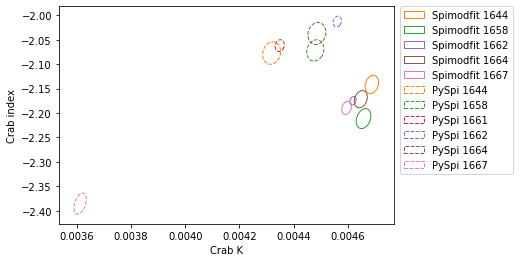

In [3]:
folders = [
    "spimodfit/1644_crab_only",
    "spimodfit/1658_crab_only",
    "spimodfit/1662_crab_only",
    "spimodfit/1664_crab_only",
    "spimodfit/1667_crab_only",
    "orbit_1644",
    "orbit_1658",
    "orbit_1661",
    "orbit_1662",
    "orbit_1664",
    "orbit_1667"
]
names = [
    "Spimodfit 1644",
    "Spimodfit 1658",
    "Spimodfit 1662",
    "Spimodfit 1664",
    "Spimodfit 1667",
    "PySpi 1644",
    "PySpi 1658",
    "PySpi 1661",
    "PySpi 1662",
    "PySpi 1664",
    "PySpi 1667"
]
edgecolors = [
    "C1",
    "C2",
    "C4",
    "C5",
    "C6",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("Crab K")
plt.ylabel("Crab index")
plt.savefig("spimodfit_comparison.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

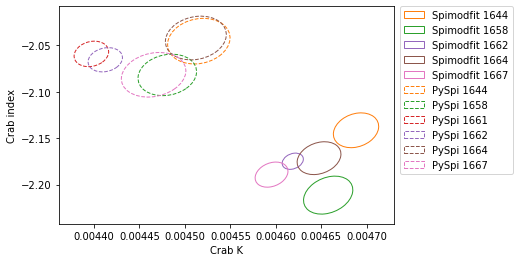

In [5]:
folders = [
    "spimodfit/1644_crab_only",
    "spimodfit/1658_crab_only",
    "spimodfit/1662_crab_only",
    "spimodfit/1664_crab_only",
    "spimodfit/1667_crab_only",
    "orbit_1644_wo_outliers",
    "orbit_1658",
    "orbit_1661_wo_outliers",
    "orbit_1662_wo_outliers",
    "orbit_1664_wo_outliers",
    "orbit_1667_spimodfit_wo_outliers"
]
names = [
    "Spimodfit 1644",
    "Spimodfit 1658",
    "Spimodfit 1662",
    "Spimodfit 1664",
    "Spimodfit 1667",
    "PySpi 1644",
    "PySpi 1658",
    "PySpi 1661",
    "PySpi 1662",
    "PySpi 1664",
    "PySpi 1667"
]
edgecolors = [
    "C1",
    "C2",
    "C4",
    "C5",
    "C6",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("Crab K")
plt.ylabel("Crab index")
plt.savefig("crab_ps_smf_wo_out.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
folders = [
    "spimodfit/1019_sec",
    "orbit_1019"
]
names = [
    "spimodfit_1019",
    "1019",
]
edgecolors = [
    "C1",
    "C1",
]
linestyles = [
    "solid",
    "dashed",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("Crab K")
plt.ylabel("Crab index")
plt.savefig("spimodfit_comparison.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

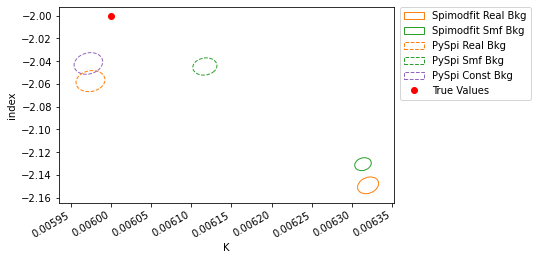

In [8]:
folders = [
    "spimodfit/0374_sim",
    "spimodfit/0374_sim_smf_bkg",
    "sim_source_0374",
    "sim_source_0374_w_smf_bkg",
    "sim_source_0374_const_bkg",
]
names = [
    "Spimodfit Real Bkg",
    "Spimodfit Smf Bkg",
    "PySpi Real Bkg",
    "PySpi Smf Bkg",
    "PySpi Const Bkg",
]
edgecolors = [
    "C1",
    "C2",
    "C1",
    "C2",
    "C4",
]
linestyles = [
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed"
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(0.006, -2, "ro", label="True Values")
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("index")
fig.autofmt_xdate()
plt.savefig("0374_sim_source.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

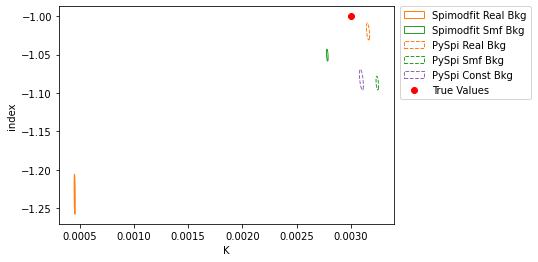

In [7]:
folders = [
    "spimodfit/1380_sim",
    "spimodfit/1380_sim_smf_bkg",
    "sim_source_1380",
    "sim_source_1380_w_smf_bkg",
    "sim_source_1380_const_bkg",
]
names = [
    "Spimodfit Real Bkg",
    "Spimodfit Smf Bkg",
    "PySpi Real Bkg",
    "PySpi Smf Bkg",
    "PySpi Const Bkg",
]
edgecolors = [
    "C1",
    "C2",
    "C1",
    "C2",
    "C4",
]
linestyles = [
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed"
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(0.003, -1, "ro", label="True Values")
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("index")
plt.savefig("1380_sim_source.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

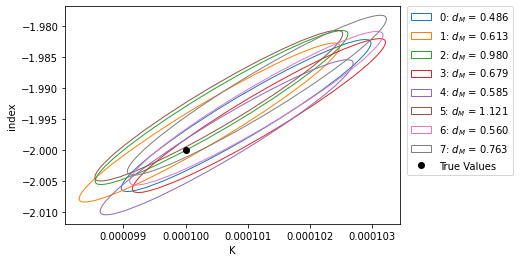

In [5]:
folders = [
    "simulated_data/0374_const_bkg_identical/t_0",
    "simulated_data/0374_const_bkg_identical/t_1",
    "simulated_data/0374_const_bkg_identical/t_2",
    "simulated_data/0374_const_bkg_identical/t_3",
    "simulated_data/0374_const_bkg_identical/t_4",
    "simulated_data/0374_const_bkg_identical/t_5",
    "simulated_data/0374_const_bkg_identical/t_6",
    "simulated_data/0374_const_bkg_identical/t_7"
]

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

real_vals = np.array([1e-4, -2])

d_M = []
for i in range(len(folders)):
    with open(f"./{folders[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M.append(mahalanobis_dist(val, cov, real_vals))
    
    

names = [f"{i}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "solid"
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("index")
plt.savefig("simulated_data/0374_const_bkg_identical/t_identical_sim_source_sb.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

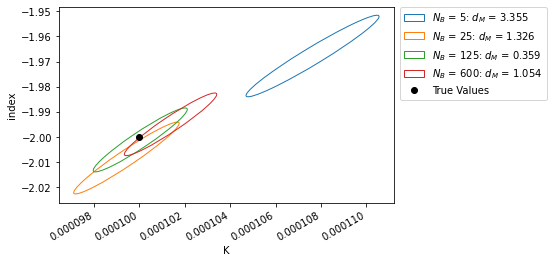

In [7]:
folders = [
    "simulated_data/0374_const_bkg_number_of_e_bins/0",
    "simulated_data/0374_const_bkg_number_of_e_bins/1",
    "simulated_data/0374_const_bkg_number_of_e_bins/2",
    "simulated_data/0374_const_bkg_number_of_e_bins/3"
]

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

real_vals = np.array([1e-4, -2])

d_M = []
for i in range(len(folders)):
    with open(f"./{folders[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M.append(mahalanobis_dist(val, cov, real_vals))
    
data_folder = "simulated_data/0374_const_bkg_number_of_e_bins"

with open(f"./{data_folder}/source_params.pickle", "rb") as f:
    source_ra, source_dec, source_piv, source_Ks, source_indices, num_bins = pickle.load(f)

names = [f"$N_B$ = {num_bins[i]}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C1",
    "C2",
    "C3",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "solid",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("index")
fig.autofmt_xdate()
plt.savefig("simulated_data/0374_const_bkg_number_of_e_bins/num_e_bins.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

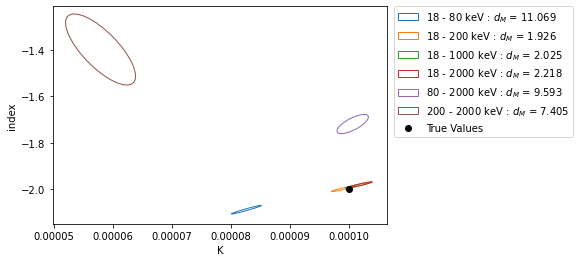

In [6]:
folders = [
    "simulated_data/0374_const_bkg_energy_ranges/0",
    "simulated_data/0374_const_bkg_energy_ranges/1",
    "simulated_data/0374_const_bkg_energy_ranges/2",
    "simulated_data/0374_const_bkg_energy_ranges/3",
    "simulated_data/0374_const_bkg_energy_ranges/4",
    "simulated_data/0374_const_bkg_energy_ranges/5",
    # "simulated_data/0374_const_bkg_energy_ranges/6",
]

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

real_vals = np.array([1e-4, -2])

d_M = []
for i in range(len(folders)):
    with open(f"./{folders[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M.append(mahalanobis_dist(val, cov, real_vals))
    
data_folder = "simulated_data/0374_const_bkg_energy_ranges"

with open(f"./{data_folder}/source_params.pickle", "rb") as f:
    source_ra, source_dec, source_piv, source_Ks, source_indices, e_range = pickle.load(f)
    
new_e_range = []
for i in e_range:
    temp = []
    if i[0] is None:
        temp.append(18)
    else:
        temp.append(i[0])
    if i[1] is None:
        temp.append(2000)
    else:
        temp.append(i[1])
    new_e_range.append(temp)

names = [f"{new_e_range[i][0]} - {new_e_range[i][1]} keV : $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    # "C6",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    # "solid",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("index")
# fig.autofmt_xdate()
plt.savefig("simulated_data/0374_const_bkg_energy_ranges/energy_ranges.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

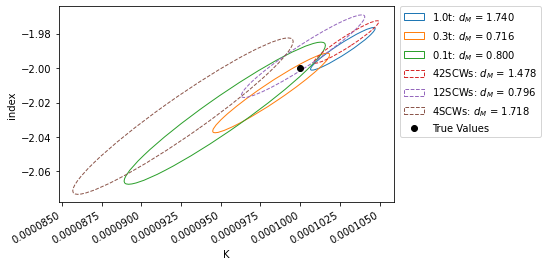

In [10]:
folders = [
    "simulated_data/0374_const_bkg_scaled_time_or_pairs/t_0",
    "simulated_data/0374_const_bkg_scaled_time_or_pairs/t_1",
    "simulated_data/0374_const_bkg_scaled_time_or_pairs/t_2",
    "simulated_data/0374_const_bkg_scaled_time_or_pairs/p_0",
    "simulated_data/0374_const_bkg_scaled_time_or_pairs/p_1",
    "simulated_data/0374_const_bkg_scaled_time_or_pairs/p_2"
]

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

real_vals = np.array([1e-4, -2])

d_M = []
for i in range(len(folders)):
    with open(f"./{folders[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M.append(mahalanobis_dist(val, cov, real_vals))
    
data_folder = "simulated_data/0374_const_bkg_number_of_e_bins"

with open(f"./{data_folder}/source_params.pickle", "rb") as f:
    source_ra, source_dec, source_piv, source_Ks, source_indices, num_bins = pickle.load(f)
    
names = ["1.0t", "0.3t", "0.1t", "42SCWs", "12SCWs", "4SCWs"]

names = [f"{names[i]}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("index")
fig.autofmt_xdate()
plt.savefig("simulated_data/0374_const_bkg_scaled_time_or_pairs/data_scaling.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

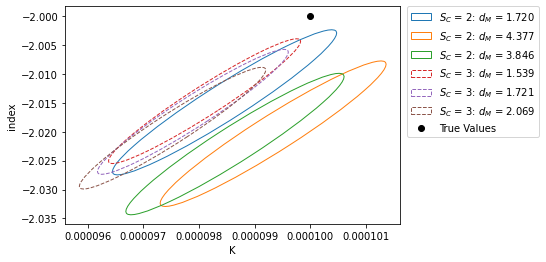

In [9]:
folders = [
    "simulated_data/0374_const_bkg_cluster_sizes/0_0",
    "simulated_data/0374_const_bkg_cluster_sizes/0_1",
    "simulated_data/0374_const_bkg_cluster_sizes/0_2",
    "simulated_data/0374_const_bkg_cluster_sizes/1_0",
    "simulated_data/0374_const_bkg_cluster_sizes/1_1",
    "simulated_data/0374_const_bkg_cluster_sizes/1_2",
]

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

real_vals = np.array([1e-4, -2])

d_M = []
for i in range(len(folders)):
    with open(f"./{folders[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M.append(mahalanobis_dist(val, cov, real_vals))
    
data_folder = "simulated_data/0374_const_bkg_cluster_sizes"

with open(f"./{data_folder}/source_params.pickle", "rb") as f:
    source_ra, source_dec, source_piv, source_Ks, source_indices, cluster_sizes = pickle.load(f)
    

names = [f"$S_C$ = {cluster_sizes[i//3]}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]


edgecolors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(real_vals[0], real_vals[1], "ko", label="True Values")
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("index")
# fig.autofmt_xdate()
plt.savefig("simulated_data/0374_const_bkg_cluster_sizes/cluster_sizes.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

0 0
[ 4.88359791e-05 -4.75122388e-01]
0 0
0 1
[ 4.73332333e-05 -2.05497420e+00]
0 1
0 2
[ 3.35918135e-05 -8.25417056e+00]
1 0
[ 1.98613737e-04 -4.94392450e-01]
1 0
1 1
[ 1.98319343e-04 -2.01860803e+00]
1 1
1 2
[ 1.31302507e-04 -8.26632594e+00]
2 0
[ 0.00080198 -0.49943315]
2 0
2 1
[ 8.01596326e-04 -2.00533251e+00]
2 1
2 2
[ 5.24009419e-04 -8.26700279e+00]


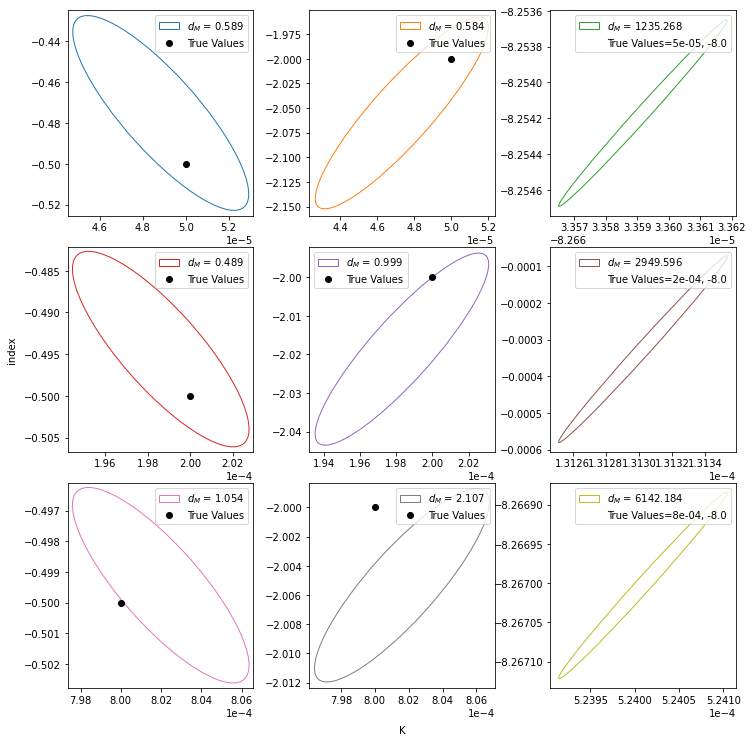

In [60]:
folders = [
    "simulated_data/0374_const_bkg/0_0",
    "simulated_data/0374_const_bkg/0_1",
    "simulated_data/0374_const_bkg/0_2",
    "simulated_data/0374_const_bkg/1_0",
    "simulated_data/0374_const_bkg/1_1",
    "simulated_data/0374_const_bkg/1_2",
    "simulated_data/0374_const_bkg/2_0",
    "simulated_data/0374_const_bkg/2_1",
    "simulated_data/0374_const_bkg/2_2",
]

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

real_vals = np.array([
    [5e-5, -0.5],
    [5e-5, -2],
    [5e-5, -8],
    [2e-4, -0.5],
    [2e-4, -2],
    [2e-4, -8],
    [8e-4, -0.5],
    [8e-4, -2],
    [8e-4, -8]
])

d_M = []
for i in range(len(folders)):
    with open(f"./{folders[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M.append(mahalanobis_dist(val, cov, real_vals[i]))
    
# data_folder = "simulated_data/0374_const_bkg"

# with open(f"./{data_folder}/source_params.pickle", "rb") as f:
#     source_ra, source_dec, source_piv, source_Ks, source_indices, num_bins = pickle.load(f)

names = [f"$d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
fig.tight_layout(h_pad=1, w_pad=2.5)
for folder, name, edgecolor, linestyle, counter in zip(folders, names, edgecolors, linestyles, range(len(folders))):
    axis = ax[counter//3, counter%3]
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, axis, 1, edgecolor=edgecolor, label=name, ls=linestyle)
    
    
    # axis.autoscale()
    
    if not counter%3 == 2:
        axis.plot(real_vals[counter,0], real_vals[counter,1], "ko", label="True Values")
    else:
        axis.plot(val[0], val[1], "wo", label=f"True Values={real_vals[counter,0]:.0e}, {real_vals[counter,1]}")
    axis.legend()
    axis.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("K", labelpad=20)
plt.ylabel("index", labelpad=28)

# lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.xlabel("K")
# plt.ylabel("index")
# plt.xscale("log")
# plt.yscale("symlog")
# fig.autofmt_xdate()
plt.savefig("simulated_data/0374_const_bkg/index_k.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

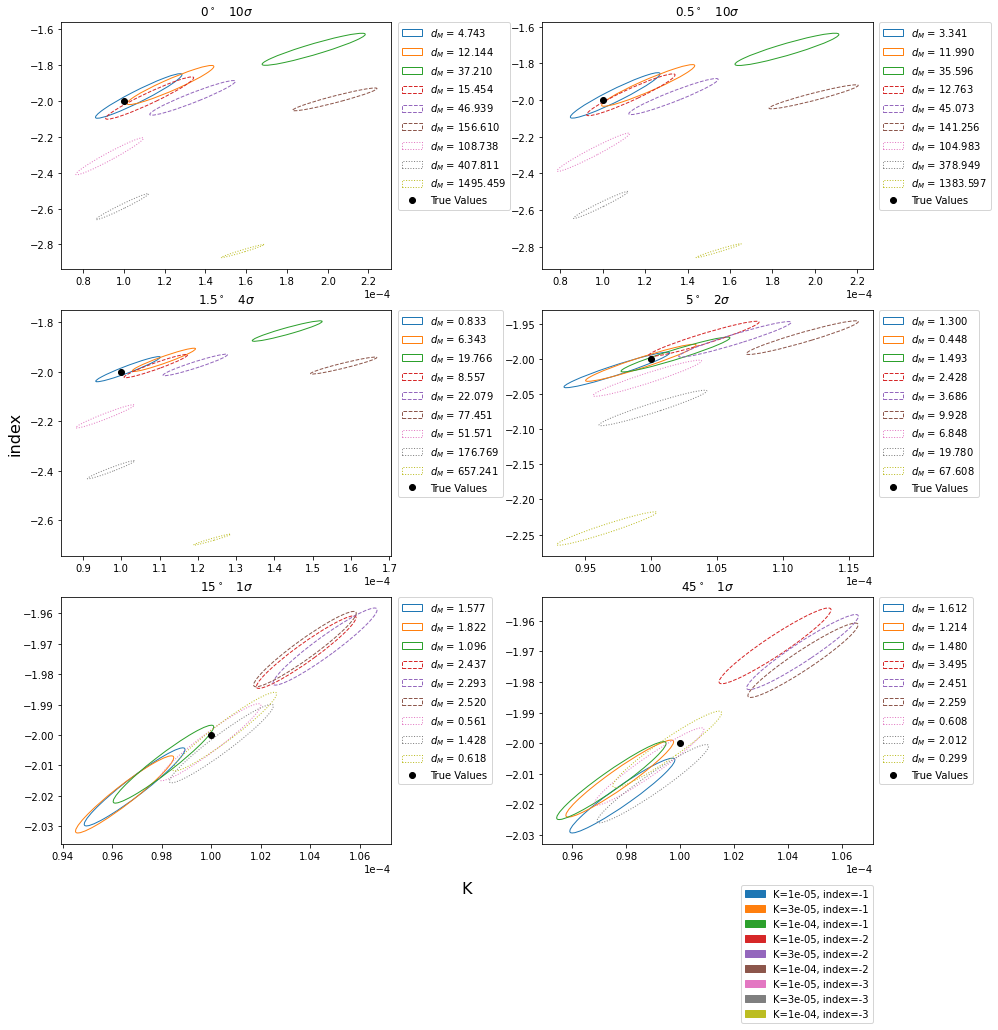

In [129]:
folders1 = [
    "simulated_data/0374_const_bkg_sec_source_i_1/0_0",
    "simulated_data/0374_const_bkg_sec_source_i_1/0_1",
    "simulated_data/0374_const_bkg_sec_source_i_1/0_2",
    "simulated_data/0374_const_bkg_sec_source_i_2/0_0",
    "simulated_data/0374_const_bkg_sec_source_i_2/0_1",
    "simulated_data/0374_const_bkg_sec_source_i_2/0_2",
    "simulated_data/0374_const_bkg_sec_source_i_3/0_0",
    "simulated_data/0374_const_bkg_sec_source_i_3/0_1",
    "simulated_data/0374_const_bkg_sec_source_i_3/0_2",
]
folders2 = [
    "simulated_data/0374_const_bkg_sec_source_i_1/1_0",
    "simulated_data/0374_const_bkg_sec_source_i_1/1_1",
    "simulated_data/0374_const_bkg_sec_source_i_1/1_2",
    "simulated_data/0374_const_bkg_sec_source_i_2/1_0",
    "simulated_data/0374_const_bkg_sec_source_i_2/1_1",
    "simulated_data/0374_const_bkg_sec_source_i_2/1_2",
    "simulated_data/0374_const_bkg_sec_source_i_3/1_0",
    "simulated_data/0374_const_bkg_sec_source_i_3/1_1",
    "simulated_data/0374_const_bkg_sec_source_i_3/1_2",
]
folders3 = [
    "simulated_data/0374_const_bkg_sec_source_i_1/2_0",
    "simulated_data/0374_const_bkg_sec_source_i_1/2_1",
    "simulated_data/0374_const_bkg_sec_source_i_1/2_2",
    "simulated_data/0374_const_bkg_sec_source_i_2/2_0",
    "simulated_data/0374_const_bkg_sec_source_i_2/2_1",
    "simulated_data/0374_const_bkg_sec_source_i_2/2_2",
    "simulated_data/0374_const_bkg_sec_source_i_3/2_0",
    "simulated_data/0374_const_bkg_sec_source_i_3/2_1",
    "simulated_data/0374_const_bkg_sec_source_i_3/2_2",
]
folders4 = [
    "simulated_data/0374_const_bkg_sec_source_i_1/3_0",
    "simulated_data/0374_const_bkg_sec_source_i_1/3_1",
    "simulated_data/0374_const_bkg_sec_source_i_1/3_2",
    "simulated_data/0374_const_bkg_sec_source_i_2/3_0",
    "simulated_data/0374_const_bkg_sec_source_i_2/3_1",
    "simulated_data/0374_const_bkg_sec_source_i_2/3_2",
    "simulated_data/0374_const_bkg_sec_source_i_3/3_0",
    "simulated_data/0374_const_bkg_sec_source_i_3/3_1",
    "simulated_data/0374_const_bkg_sec_source_i_3/3_2",
]
folders5 = [
    "simulated_data/0374_const_bkg_sec_source_i_1/4_0",
    "simulated_data/0374_const_bkg_sec_source_i_1/4_1",
    "simulated_data/0374_const_bkg_sec_source_i_1/4_2",
    "simulated_data/0374_const_bkg_sec_source_i_2/4_0",
    "simulated_data/0374_const_bkg_sec_source_i_2/4_1",
    "simulated_data/0374_const_bkg_sec_source_i_2/4_2",
    "simulated_data/0374_const_bkg_sec_source_i_3/4_0",
    "simulated_data/0374_const_bkg_sec_source_i_3/4_1",
    "simulated_data/0374_const_bkg_sec_source_i_3/4_2",
]
folders6 = [
    "simulated_data/0374_const_bkg_sec_source_i_1/5_0",
    "simulated_data/0374_const_bkg_sec_source_i_1/5_1",
    "simulated_data/0374_const_bkg_sec_source_i_1/5_2",
    "simulated_data/0374_const_bkg_sec_source_i_2/5_0",
    "simulated_data/0374_const_bkg_sec_source_i_2/5_1",
    "simulated_data/0374_const_bkg_sec_source_i_2/5_2",
    "simulated_data/0374_const_bkg_sec_source_i_3/5_0",
    "simulated_data/0374_const_bkg_sec_source_i_3/5_1",
    "simulated_data/0374_const_bkg_sec_source_i_3/5_2",
]
t_folders = (folders1, folders2, folders3, folders4, folders5, folders6)

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

real_vals = np.array([1e-4,-2])

d_M1 = []
for i in range(len(folders1)):
    with open(f"./{folders1[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M1.append(mahalanobis_dist(val, cov, real_vals))
    
d_M2 = []
for i in range(len(folders2)):
    with open(f"./{folders2[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M2.append(mahalanobis_dist(val, cov, real_vals))
    
d_M3 = []
for i in range(len(folders3)):
    with open(f"./{folders3[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M3.append(mahalanobis_dist(val, cov, real_vals))
    
d_M4 = []
for i in range(len(folders4)):
    with open(f"./{folders4[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M4.append(mahalanobis_dist(val, cov, real_vals))
    
d_M5 = []
for i in range(len(folders5)):
    with open(f"./{folders5[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M5.append(mahalanobis_dist(val, cov, real_vals))
    
d_M6 = []
for i in range(len(folders6)):
    with open(f"./{folders6[i]}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    d_M6.append(mahalanobis_dist(val, cov, real_vals))
    
t_d_M = (d_M1, d_M2, d_M3, d_M4, d_M5, d_M6)
    
# data_folder = "simulated_data/0374_const_bkg"

# with open(f"./{data_folder}/source_params.pickle", "rb") as f:
#     source_ra, source_dec, source_piv, source_Ks, source_indices, num_bins = pickle.load(f)

names1 = [f"$d_M$ = {d_M1[i]:.3f}" for i in range(len(d_M1))]
names2 = [f"$d_M$ = {d_M2[i]:.3f}" for i in range(len(d_M2))]
names3 = [f"$d_M$ = {d_M3[i]:.3f}" for i in range(len(d_M3))]
names4 = [f"$d_M$ = {d_M4[i]:.3f}" for i in range(len(d_M4))]
names5 = [f"$d_M$ = {d_M5[i]:.3f}" for i in range(len(d_M5))]
names6 = [f"$d_M$ = {d_M6[i]:.3f}" for i in range(len(d_M6))]

t_names = (names1, names2, names3, names4, names5, names6)

edgecolors = [
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed",
    "dotted",
    "dotted",
    "dotted",
]
sd = [10, 10, 4, 2, 1, 1]
ang_difs = [0, 0.5, 1.5, 5, 15, 45]

labels = [
    [0.1e-4, -1],
    [0.3e-4, -1],
    [1e-4, -1],
    [0.1e-4, -2],
    [0.3e-4, -2],
    [1e-4, -2],
    [0.1e-4, -3],
    [0.3e-4, -3],
    [1e-4, -3],
]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.tight_layout(h_pad=2, w_pad=12)
for plot, folders, names, d_M in zip(range(6), t_folders, t_names, t_d_M):
    axis = ax[plot//2, plot%2]
    for folder, name, edgecolor, linestyle, counter in zip(folders, names, edgecolors, linestyles, range(9)):
        with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
            val, cov = pickle.load(f)
        confidence_ellipse(val, cov, axis, sd[plot], edgecolor=edgecolor, label=name, ls=linestyle)
        
        
        axis.autoscale()
        

    axis.plot(real_vals[0], real_vals[1], "ko", label="True Values")
    axis.set_title(f"{ang_difs[plot]}$^\circ$   {sd[plot]}$\sigma$")
    lgda = axis.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    axis.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("K", labelpad=20, fontsize=16)
plt.ylabel("index", labelpad=16, fontsize=16)


import matplotlib.patches as mpatches

patch = mpatches.Patch(color='C0', label='Manual Label')

handles = [mpatches.Patch(color=f'C{i}', label=f'K={labels[i][0]:.0e}, index={labels[i][1]}') for i in range(9)]

lgdp = plt.legend(handles=handles, bbox_to_anchor=(1, -0.05), loc=1, borderaxespad=0.)

# lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.xlabel("K")
# plt.ylabel("index")
# plt.xscale("log")
# plt.yscale("symlog")
# fig.autofmt_xdate()
plt.savefig("simulated_data/0374_const_bkg_sec_source_i_1/sec_source.pdf", bbox_extra_artists=(lgdp,lgda), bbox_inches='tight')